# AM Example
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tinyalg/waveu-ideas/blob/example-am/examples/am/docs/am.ipynb)
[![Run on ESP32](https://img.shields.io/badge/Run%20on-ESP32-orange?logo=espressif)](https://github.com/tinyalg/waveu-ideas/tree/example-am/examples/am)

## What is Amplitude Modulation?

Amplitude Modulation (AM) is a method of modulating a carrier wave by varying its amplitude in proportion to the amplitude of the input signal, typically a low-frequency audio signal. The carrier wave's frequency remains constant, but its amplitude fluctuates according to the instantaneous amplitude of the modulating signal.

**Key Characteristics of AM:**
- **Carrier Wave:** A high-frequency signal used to "carry" the information.
- **Modulating Signal:** The lower-frequency input signal containing the information to be transmitted.
- **Resulting Wave:** The modulated wave consists of the carrier frequency and two sidebands (upper and lower), which are mirror images of the modulating signal.

**Applications of AM:**
- **Broadcasting:** AM has been widely used in radio broadcasting (e.g., AM radio).
- **Communication:** Used in aviation and maritime communication due to its simplicity and reliability.

That sounds like a solid structure for an AM example notebook! Here's how you can structure it, including a smooth transition from **"What is AM?"** to the **Multiplicative Form**, followed by the plot:

---

## 1. Multiplicative Form
The AM wave can be described mathematically using the multiplicative form. If:
- The **carrier wave** is:
  $$
  c(t) = A_c \sin(2\pi f_c t)
  $$
- The **modulating signal** is:
  $$
  m(t) = A_m \sin(2\pi f_m t)
  $$

Then the **AM wave** is:
$$
s(t) = \left[A_c + m(t)\right] \sin(2\pi f_c t)
$$

This equation represents how the amplitude of the carrier wave $ c(t) $ is varied (modulated) by the modulating signal $ m(t) $.

### Visualization
Below is the visualization of:
- $ c(t) $: The carrier wave.
- $ m(t) $: The modulating signal.
- $ s(t) $: The resulting AM wave.

<Figure size 1200x600 with 0 Axes>

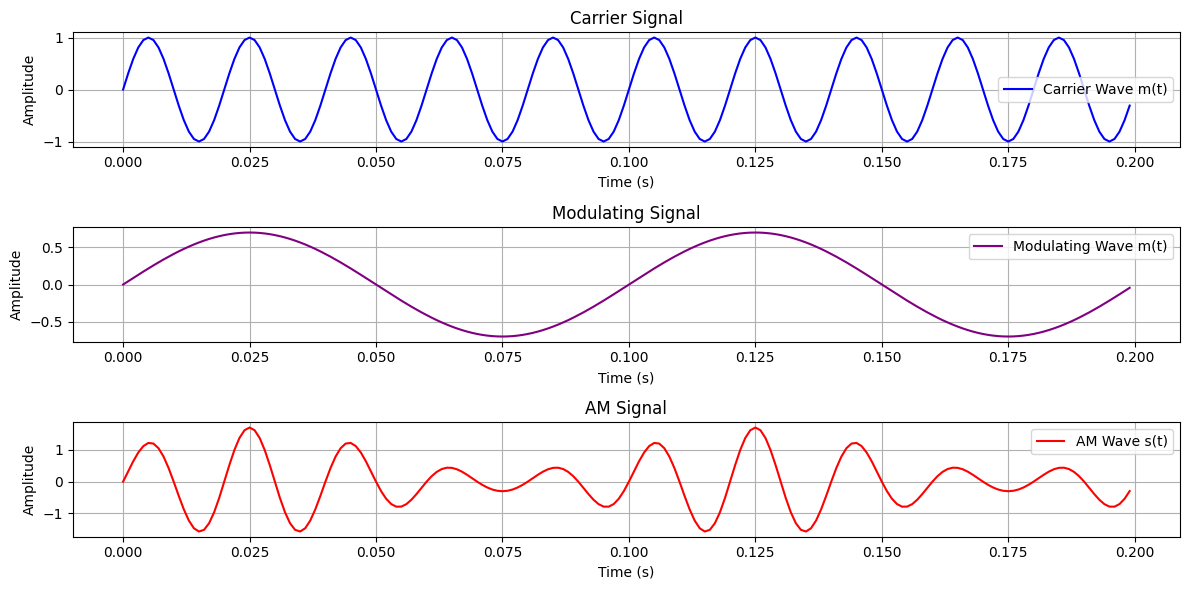

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration parameters
fs = 1000  # Sampling frequency (samples per second)
duration = 0.2  # Duration of the signal (seconds)
fc = 50  # Carrier frequency (Hz)
fm = 10  # Modulating frequency (Hz)
Ac = 1.0  # Carrier amplitude
Am = 0.7  # Modulating amplitude

# Time vector
time = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Modulating signal (m(t))
modulating_signal = Am * np.sin(2 * np.pi * fm * time)

# AM signal: s(t) = [Ac + m(t)] * sin(2 * pi * fc * t)
am_signal = (Ac + modulating_signal) * np.sin(2 * np.pi * fc * time)
carrier_signal = Ac * np.sin(2 * np.pi * fc * time)

plt.figure(figsize=(12, 6))

# Plot the carrier signal
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, carrier_signal, label="Carrier Wave m(t)", color="blue")
plt.title("Carrier Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Plot the modulating signal
plt.subplot(3, 1, 2)
plt.plot(time, modulating_signal, label="Modulating Wave m(t)", color="purple")
plt.title("Modulating Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Plot the AM signal
plt.subplot(3, 1, 3)
plt.plot(time, am_signal, label="AM Wave s(t)", color="red")
plt.title("AM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 2. Substitution form
The AM wave is given by:
$$
s(t) = \left[A_c + m(t)\right] \sin(2\pi f_c t)
$$
where $ m(t) = A_m \sin(2\pi f_m t) $. Substituting $ m(t) $ into the equation, we get:
$$
s(t) = \left[A_c + A_m \sin(2\pi f_m t)\right] \sin(2\pi f_c t)
$$

Distribute $ \sin(2\pi f_c t) $:
$$
s(t) = A_c \sin(2\pi f_c t) + A_m \sin(2\pi f_m t) \sin(2\pi f_c t)
$$

Using the trigonometric identity:
$$
\sin(A) \sin(B) = \frac{1}{2} \left[\cos(A-B) - \cos(A+B)\right]
$$
we expand $ \sin(2\pi f_m t) \sin(2\pi f_c t) $:
$$
\sin(2\pi f_m t) \sin(2\pi f_c t) = \frac{1}{2} \left[\cos(2\pi (f_c - f_m)t) - \cos(2\pi (f_c + f_m)t)\right]
$$

Substitute this back into $ s(t) $:
$$
s(t) = A_c \sin(2\pi f_c t) + \frac{A_m}{2} \left[\cos(2\pi (f_c - f_m)t) - \cos(2\pi (f_c + f_m)t)\right]
$$

Rearranging, we get the final expanded form:
$$
s(t) = A_c \sin(2\pi f_c t) + \frac{A_m}{2} \cos(2\pi (f_c - f_m)t) - \frac{A_m}{2} \cos(2\pi (f_c + f_m)t)
$$

### Visualization

Below are the plots of:
1. **Carrier Wave**: $ A_c \sin(2\pi f_c t) $,
2. **Lower Sideband**: $ \frac{A_m}{2} \cos(2\pi (f_c - f_m)t) $,
3. **Upper Sideband**: $ -\frac{A_m}{2} \cos(2\pi (f_c + f_m)t) $,
4. The resulting **AM Signal**: $ s(t) $.

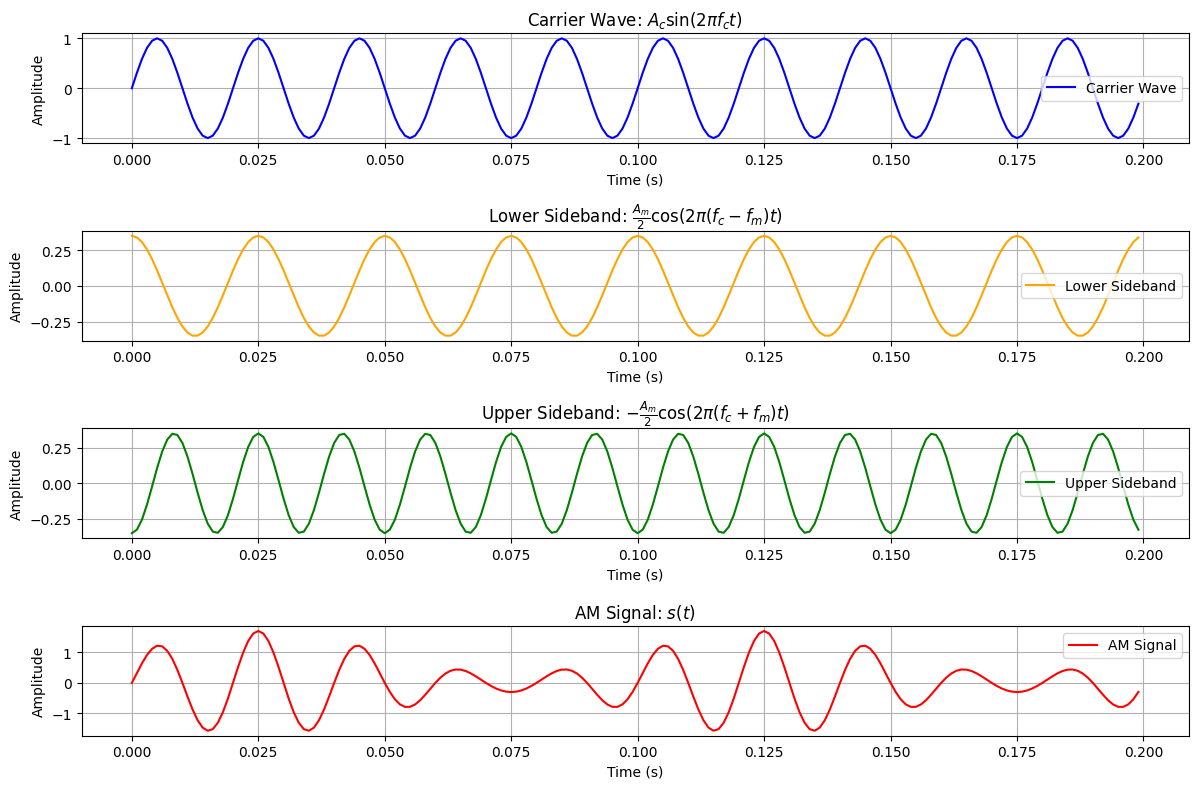

In [166]:
# Configuration parameters
fs = 1000  # Sampling frequency (samples per second)
duration = 0.2  # Duration of the signal (seconds)
fc = 50  # Carrier frequency (Hz)
fm = 10  # Modulating frequency (Hz)
Ac = 1.0  # Carrier amplitude
Am = 0.7  # Modulating amplitude

# Time vector
time = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Carrier component
carrier = Ac * np.sin(2 * np.pi * fc * time)

# Lower sideband component
lower_sideband = (Am / 2) * np.cos(2 * np.pi * (fc - fm) * time)

# Upper sideband component
upper_sideband = -(Am / 2) * np.cos(2 * np.pi * (fc + fm) * time)

# AM signal: s(t) = carrier + lower_sideband + upper_sideband
am_signal = carrier + lower_sideband + upper_sideband

# Plot the components and the AM signal
plt.figure(figsize=(12, 8))

# Plot carrier
plt.subplot(4, 1, 1)
plt.plot(time, carrier, label="Carrier Wave", color="blue")
plt.title("Carrier Wave: $A_c \\sin(2\\pi f_c t)$", fontsize=12)
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Amplitude", fontsize=10)
plt.grid(True)
plt.legend()

# Plot lower sideband
plt.subplot(4, 1, 2)
plt.plot(time, lower_sideband, label="Lower Sideband", color="orange")
plt.title("Lower Sideband: $\\frac{A_m}{2} \\cos(2\\pi (f_c - f_m)t)$", fontsize=12)
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Amplitude", fontsize=10)
plt.grid(True)
plt.legend()

# Plot upper sideband
plt.subplot(4, 1, 3)
plt.plot(time, upper_sideband, label="Upper Sideband", color="green")
plt.title("Upper Sideband: $-\\frac{A_m}{2} \\cos(2\\pi (f_c + f_m)t)$", fontsize=12)
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Amplitude", fontsize=10)
plt.grid(True)
plt.legend()

# Plot AM signal
plt.subplot(4, 1, 4)
plt.plot(time, am_signal, label="AM Signal", color="red")
plt.title("AM Signal: $s(t)$", fontsize=12)
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Amplitude", fontsize=10)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Which Form to Use?

When generating AM waves, the substitution form is strongly recommended over the multiplicative form due to two key advantages:

---

### 1. Error Reduction
The multiplicative form:
$$
s(t) = [A_c + m(t)] \sin(2\pi f_c t)
$$
requires runtime multiplication of LUT-derived values. This compounds errors from quantization and interpolation, leading to significant inaccuracies in the output.

In contrast, the substitution form:
$$
s(t) = A_c \sin(2\pi f_c t) + \frac{A_m}{2} \cos(2\pi (f_c - f_m)t) - \frac{A_m}{2} \cos(2\pi (f_c + f_m)t)
$$
avoids runtime multiplication by precomputing the carrier and sideband components. Errors from individual LUTs combine **linearly** when added, resulting in a much more accurate signal.

---

### 2. Computational Efficiency
Addition is inherently faster and less resource-intensive than multiplication, especially on microcontrollers. Using the substitution form:
- Reduces runtime operations to simple additions and LUT lookups.
- Ensures high sampling rates can be achieved without overloading the processor.
- Conserves energy, making it suitable for resource-constrained, battery-powered systems.

---

### Conclusion
The substitution form minimizes errors and optimizes performance, making it ideal for real-time AM waveform generation. Its combination of accuracy and computational efficiency ensures reliable operation, even on low-cost microcontrollers.